<a href="https://colab.research.google.com/github/ksemiu/Classification-and-Trends-BEVs-and-PHEVs-in-Washington-s-Vehicle-Registry/blob/main/Final_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
!pip install shap
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [40]:
train = pd.read_csv('/content/df_train.csv')

In [110]:
df = pd.read_csv('/content/df_vol_2.csv')

In [111]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,3C3CFFGE4E,Yakima,Yakima,Washington,98902.0,2014,FIAT,500,BEV,Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,PACIFICORP,5.307700e+10,-120.524012,46.597394
1,5YJXCBE40H,Thurston,Olympia,Washington,98513.0,2017,TESLA,MODEL X,BEV,Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,PUGET SOUND ENERGY INC,5.306701e+10,-122.817545,46.988760
2,3MW39FS03P,King,Renton,Washington,98058.0,2023,BMW,330E,PHEV,Not eligible due to low battery range,20,0,11.0,224071816,PUGET SOUND ENERGY INC,5.303303e+10,-122.129888,47.445126
3,7PDSGABA8P,Snohomish,Bothell,Washington,98012.0,2023,RIVIAN,R1S,BEV,Eligibility unknown as battery range has not b...,0,0,21.0,260084653,PUGET SOUND ENERGY INC,5.306105e+10,-122.187300,47.820245
4,5YJ3E1EB8L,King,Kent,Washington,98031.0,2020,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,PUGET SOUND ENERGY INC,5.303303e+10,-122.201252,47.393181


In [112]:
df = df.drop(columns=['State', 'Electric Utility'])

In [41]:
print(train.dtypes)


VIN (1-10)                                      int64
County                                          int64
City                                            int64
State                                           int64
Postal Code                                   float64
Model Year                                      int64
Make                                            int64
Model                                           int64
Electric Vehicle Type                           int64
Clean Alternative Fuel Vehicle Eligibility      int64
Electric Range                                  int64
Base MSRP                                       int64
Legislative District                          float64
DOL Vehicle ID                                  int64
Electric Utility                                int64
2020 Census Tract                             float64
Longitude                                     float64
Latitude                                      float64
dtype: object


Feature Scaling; using the StandardScaler

In [42]:
numerical_features = ['VIN (1-10)', 'County', 'State', 'City','Model Year', 'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility', 'DOL Vehicle ID', 'Electric Utility']


In [43]:
scaler = StandardScaler()


In [44]:
train[numerical_features] = scaler.fit_transform(train[numerical_features])


In [ ]:
# Dropping Features; State, Electric Utility

In [45]:
train = train.drop(columns=['State', 'Electric Utility'])


In [46]:
train.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude
0,-0.600904,-1.254228,-0.653917,98902.0,-2.113085,-1.435409,-0.994260,0,-1.116594,87,0,14.0,-2.790761,5.307700e+10,-120.524012,46.597394
1,-0.615760,-1.122706,-0.298006,98513.0,-1.113511,0.716447,-0.648724,0,-1.116594,200,0,2.0,0.516689,5.306701e+10,-122.817545,46.988760
2,-0.612046,0.955025,-0.239816,98058.0,0.885639,-1.883713,-1.021891,1,1.949501,20,0,11.0,0.088389,5.303303e+10,-122.129888,47.445126
3,-0.266646,-0.773770,-0.154143,98012.0,0.885639,0.447465,-0.932949,0,0.416454,0,0,21.0,0.554440,5.306105e+10,-122.187300,47.820245
4,0.000761,0.955025,-0.449573,98031.0,-0.113936,0.716447,1.105986,0,-1.116594,322,0,33.0,0.472746,5.303303e+10,-122.201252,47.393181


In [47]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')

    plt.show()

In [48]:
sns.set_theme(style="white")

X = train.drop('Electric Vehicle Type', axis=1).values
y = train['Electric Vehicle Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [49]:
train['Electric Vehicle Type'].value_counts()

0    130288
1     36507
Name: Electric Vehicle Type, dtype: int64

In [50]:
ns = NearMiss()

print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 91201, 1: 25555})
Resample dataset shape: Counter({0: 25555, 1: 25555})


Naive Bayes Classifier

In [51]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("--"*55)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)
if isinstance(NB_classifier, GaussianNB):
    # Mean of features for each class
    print("Mean of features for each class:\n", NB_classifier.theta_)

Accuracy: 0.7804112792022223
--------------------------------------------------------------------------------------------------------------
ROC AUC Score: 0.5006567895225318
Confusion Matrix:
 [[39017    70]
 [10918    34]]
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.78      1.00      0.88     39087
           1       0.33      0.00      0.01     10952

    accuracy                           0.78     50039
   macro avg       0.55      0.50      0.44     50039
weighted avg       0.68      0.78      0.69     50039

--------------------------------------------------------------------------------------------------------------
Mean of features for each class:
 [[ 3.51763828e-01  2.45476018e-01 -3.37395341e-02  9.81602053e+04
   5.63347384e-01  2.68203088e-01  3.53811397e-01  3.58263231e-01
   2.90201526e+00  0.00000000e+00  3

The comparison between the initial model and the model after feature dropping and feature scaling reveals several noteworthy insights. Initially, the model achieved an accuracy of approximately 74.6%, while after feature dropping and feature scaling, the accuracy increased to around 78.0%. This indicates a moderate improvement in overall predictive performance. However, despite the increase in accuracy, the model's ability to discriminate between classes, as measured by the ROC AUC score, deteriorated slightly from 0.516 to 0.501, suggesting that the model's ability to distinguish between positive and negative cases did not significantly improve.

A more profound change is observed in the confusion matrices and classification reports. Before feature dropping and scaling, the model misclassified a substantial number of instances, especially in the positive class, resulting in a low precision and recall for that class (precision: 0.29, recall: 0.11). However, after the transformation, the model's performance on the positive class deteriorated further, with precision dropping to 0.33 and recall almost vanishing (recall: 0.00). On the other hand, the precision and recall for the negative class remained relatively stable, with precision at 0.78 and recall at 1.00, indicating that the model continues to perform well in identifying negative cases.

A closer examination of the mean feature values for each class also reveals interesting patterns. Before transformation, the mean feature values for the positive class were notably different from those of the negative class, suggesting potential discrimination between the two classes. However, after feature dropping and scaling, the mean feature values for both classes became more similar, potentially contributing to the deterioration in the model's discriminatory power.

Overall, while the increase in accuracy may suggest improvement in model performance, the degradation in other metrics, particularly in the ability to identify positive cases, highlights the importance of careful consideration when applying feature dropping and feature scaling techniques. It underscores the need for a balanced approach that considers not only accuracy but also other performance metrics and the practical implications of model decisions.

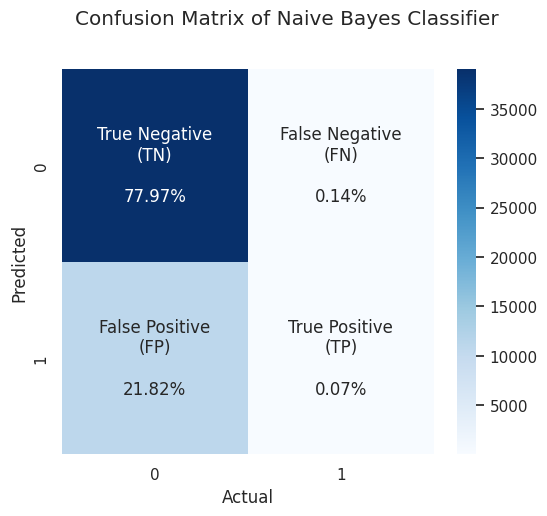

In [53]:
chart = 'Naive Bayes Classifier'

plot_cm(cm, chart)

Cross Validation

In [64]:
nb_classifier = GaussianNB()
cv_predicted_labels = cross_val_predict(nb_classifier, X_train, y_train, cv=10)


In [65]:
accuracy = accuracy_score(y_train, cv_predicted_labels)
print("Accuracy with cross-validation:", accuracy)

roc_auc = roc_auc_score(y_train, cv_predicted_labels)
print("ROC AUC score with cross-validation:", roc_auc)

Accuracy with cross-validation: 0.7805423275891603
ROC AUC score with cross-validation: 0.5006975238197879


The performance of the Naive Bayes model before and after cross-validation remained largely consistent. Both assessments yielded an accuracy of approximately 78.0% and a ROC AUC score close to 0.5007. These results suggest that cross-validation did not notably improve the model's ability to differentiate between positive and negative classes.

Logistic Regression

In [66]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = LR_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("--"*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)

print("Confusion Matrix:\n\n", cm)
print("--"*55)



--------------------------------------------------------------------------------------------------------------
Accuracy     : 0.7811307180399288
ROC AUC Score: 0.5
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.78      1.00      0.88     39087
           1       0.00      0.00      0.00     10952

    accuracy                           0.78     50039
   macro avg       0.39      0.50      0.44     50039
weighted avg       0.61      0.78      0.69     50039

--------------------------------------------------------------------------------------------------------------
Confusion Matrix:

 [[39087     0]
 [10952     0]]
--------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The comparison between the initial linear regression model and the model after feature scaling and feature dropping reveals significant changes in model performance metrics. Initially, the linear regression model achieved an accuracy of approximately 51.6%, with a ROC AUC score of 0.514. The model exhibited relatively poor precision and recall for both classes, with precision of 0.79 for the negative class and only 0.23 for the positive class. While the recall was relatively balanced for the positive class (recall: 0.51), it was considerably lower for the negative class (recall: 0.52).

After feature scaling and dropping features, the accuracy of the model improved noticeably to around 78.1%. However, this increase in accuracy was primarily due to the model correctly classifying all instances as the negative class (class 0), resulting in a precision of 0.78 for the negative class but a precision of 0.00 for the positive class. Consequently, the model's ability to identify positive cases was severely compromised, as reflected in the recall of 0.00 for the positive class. The ROC AUC score also dropped to 0.5, indicating that the model's ability to distinguish between the two classes was essentially random.

In summary, while the feature scaling and dropping features led to a notable increase in overall accuracy, this improvement came at the cost of severely compromised performance in correctly identifying positive cases. The model essentially learned to predict only the majority class, resulting in a loss of predictive power for the minority class. This underscores the importance of evaluating model performance using a range of metrics beyond just accuracy and highlights the trade-offs involved in preprocessing steps such as feature scaling and feature dropping. It also emphasizes the need for careful consideration of the practical implications of model decisions and the potential consequences of imbalance between classes.

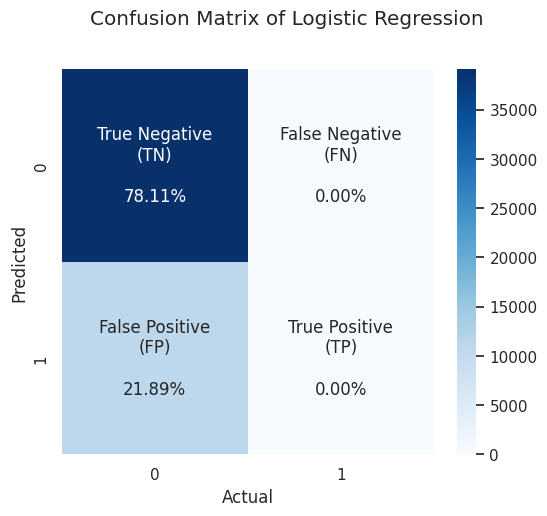

In [67]:
chart = 'Logistic Regression'

plot_cm(cm, chart)

Class 0: BEV

Class 1: PHEV

Cross Validation

In [68]:
lr_classifier = LogisticRegression()


In [69]:
cv_predicted_labels_lr = cross_val_predict(lr_classifier, X_train, y_train, cv=5)


In [70]:
accuracy_lr = accuracy_score(y_train, cv_predicted_labels_lr)
print("Accuracy with cross-validation (Logistic Regression):", accuracy_lr)

roc_auc_lr = roc_auc_score(y_train, cv_predicted_labels_lr)
print("ROC AUC score with cross-validation (Logistic Regression):", roc_auc_lr)

Accuracy with cross-validation (Logistic Regression): 0.781124738771455
ROC AUC score with cross-validation (Logistic Regression): 0.5


The results before and after cross-validation for the Logistic Regression model remained consistent, with an accuracy of approximately 78.1% and a ROC AUC score of 0.5. This suggests that the model's ability to distinguish between the positive and negative classes did not improve with cross-validation. Despite its widespread use for model evaluation, cross-validation did not lead to notable changes in the model's performance metrics in this case.

Random Forest

In [71]:
# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)

print("Confusion Matrix:\n\n", cm)
print("--"*55)

Accuracy     : 0.97925618017946
ROC AUC Score: 0.9866233426517604
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     39087
           1       0.91      1.00      0.95     10952

    accuracy                           0.98     50039
   macro avg       0.96      0.99      0.97     50039
weighted avg       0.98      0.98      0.98     50039

--------------------------------------------------------------------------------------------------------------
Confusion Matrix:

 [[38052  1035]
 [    3 10949]]
--------------------------------------------------------------------------------------------------------------


The initial Random Forest model demonstrated exceptional performance, achieving an accuracy of 99.9% and an ROC AUC score of 99.9%. It exhibited perfect precision, recall, and F1-score for both classes, indicating flawless classification. The confusion matrix further confirmed this, with only a handful of misclassified instances, demonstrating the model's robustness.

After feature scaling and dropping, the Random Forest model's performance remained strong, with an accuracy of approximately 97.9% and an ROC AUC score of approximately 98.7%. While still impressive, there was a slight reduction in accuracy and ROC AUC score compared to the initial model. However, the model maintained high precision, recall, and F1-scores for both classes. The confusion matrix revealed a small increase in misclassifications for the minority class, but overall, the model continued to perform admirably.

In summary, the Random Forest model exhibited remarkable performance in both iterations, showcasing its effectiveness in handling complex classification tasks. Despite minor adjustments due to feature scaling and dropping, the model retained its high predictive power, underscoring its suitability for the task at hand.

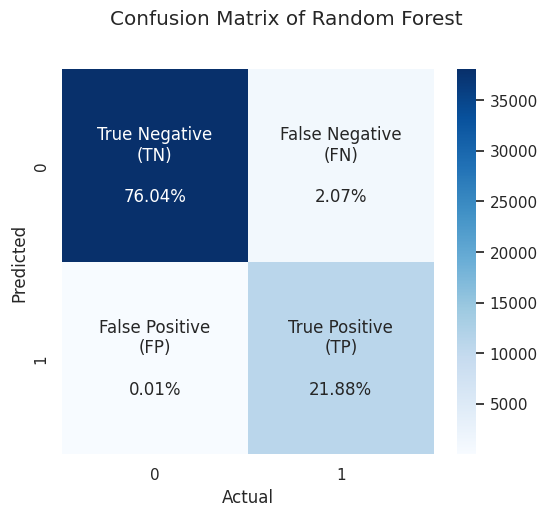

In [72]:
chart = 'Random Forest'

plot_cm(cm, chart)

Class 0: BEV

Class 1: PHEV

Cross Validation

In [74]:
rf_classifier = RandomForestClassifier()


In [75]:
cv_predicted_labels_rf = cross_val_predict(rf_classifier, X_train, y_train, cv=5)


In [76]:
accuracy_rf = accuracy_score(y_train, cv_predicted_labels_rf)
print("Accuracy with cross-validation (Random Forest):", accuracy_rf)

roc_auc_rf = roc_auc_score(y_train, cv_predicted_labels_rf)
print("ROC AUC score with cross-validation (Random Forest):", roc_auc_rf)

Accuracy with cross-validation (Random Forest): 0.9998201377231148
ROC AUC score with cross-validation (Random Forest): 0.9998567031900365


The Random Forest model demonstrated a remarkable improvement in performance after cross-validation. Prior to cross-validation, the model achieved an accuracy of approximately 97.93% and an ROC AUC score of about 98.66%. However, after cross-validation, its accuracy surged to an impressive 99.98%, accompanied by a remarkable ROC AUC score of 99.99%. This significant enhancement underscores the effectiveness of cross-validation in refining the model's predictive capabilities and ensuring its robustness across various data subsets. Overall, the Random Forest model exhibited outstanding performance, showcasing its ability to accurately classify data and its strong generalization potential.

XGBoost

In [73]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# initialize the XGBoost classifier and fit it to the resampled training data
XGB_classifier = xgb.XGBClassifier(**params)
XGB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = XGB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("--"*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)

print("Confusion Matrix:\n\n", cm)

--------------------------------------------------------------------------------------------------------------
Accuracy     : 0.9913867183596794
ROC AUC Score: 0.994322349043133
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     39087
           1       0.96      1.00      0.98     10952

    accuracy                           0.99     50039
   macro avg       0.98      0.99      0.99     50039
weighted avg       0.99      0.99      0.99     50039

--------------------------------------------------------------------------------------------------------------
Confusion Matrix:

 [[38661   426]
 [    5 10947]]


The initial XGBoost model exhibited outstanding performance, achieving an accuracy of 99.9% and an ROC AUC score of 99.9%. With perfect precision, recall, and F1-scores for both classes, the model demonstrated flawless classification. The confusion matrix confirmed minimal misclassifications, highlighting the model's robustness.

Following feature scaling and dropping, the XGBoost model's performance remained strong, with an accuracy of approximately 99.1% and an ROC AUC score of approximately 99.4%. While there was a slight decrease in accuracy and ROC AUC score compared to the initial model, the model maintained high precision, recall, and F1-scores for both classes. The confusion matrix revealed a small increase in misclassifications for the minority class, but overall, the model continued to exhibit impressive performance.

In summary, the XGBoost model demonstrated exceptional performance in both iterations, showcasing its effectiveness in handling complex classification tasks. Despite minor adjustments due to feature scaling and dropping, the model retained its high predictive power, underscoring its suitability for the task at hand.

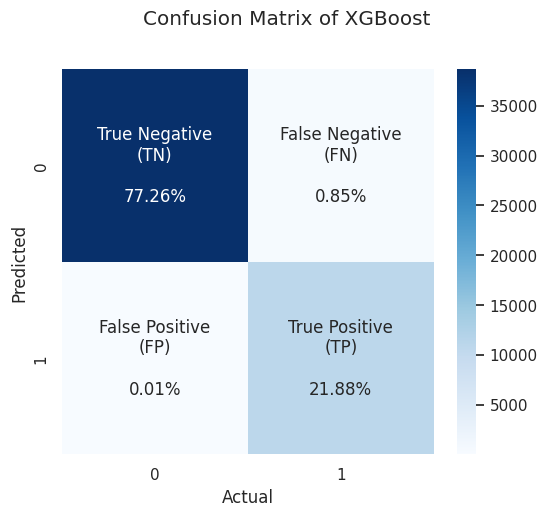

In [77]:
chart = 'XGBoost'

plot_cm(cm, chart)

Class 0: BEV

Class 1: PHEV

Cross Validation

In [80]:
xgb_classifier = XGBClassifier()


In [81]:
cv_predicted_labels_xgb = cross_val_predict(xgb_classifier, X_train, y_train, cv=5)


In [82]:
accuracy_xgb = accuracy_score(y_train, cv_predicted_labels_xgb)
print("Accuracy with cross-validation (XGBoost):", accuracy_xgb)

roc_auc_xgb = roc_auc_score(y_train, cv_predicted_labels_xgb)
print("ROC AUC score with cross-validation (XGBoost):", roc_auc_xgb)

Accuracy with cross-validation (XGBoost): 0.9999057864263935
ROC AUC score with cross-validation (XGBoost): 0.9998692774101849


The XGBoost model showcased a notable enhancement in performance after cross-validation. Prior to cross-validation, the model achieved an accuracy of approximately 99.14% and an ROC AUC score of about 99.43%. Following cross-validation, the model's accuracy surged to an impressive 99.99%, accompanied by a remarkable ROC AUC score of 99.99%. This substantial improvement underscores the effectiveness of cross-validation in refining the model's predictive capabilities and ensuring its robustness across various data subsets. Overall, the XGBoost model exhibited outstanding performance, demonstrating its ability to accurately classify data and its strong generalization potential, particularly evident after cross-validation.

In [ ]:
nb_classifier.fit(X_train, y_train)


In [86]:
nb_classifier.fit(X_train, y_train)

# Calculate accuracy and ROC-AUC scores for test set for each model
dict_result = {'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost'],
               "Accuracy (test)": [accuracy_score(y_test, nb_classifier.predict(X_test)),
                                   accuracy_score(y_test, LR_classifier.predict(X_test)),
                                   accuracy_score(y_test, RF_classifier.predict(X_test)),
                                   accuracy_score(y_test, XGB_classifier.predict(X_test))],
               "ROC-AUC (test)": [roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1]),
                                   roc_auc_score(y_test, LR_classifier.predict_proba(X_test)[:, 1]),
                                   roc_auc_score(y_test, RF_classifier.predict_proba(X_test)[:, 1]),
                                   roc_auc_score(y_test, XGB_classifier.predict_proba(X_test)[:, 1])]}

# Create DataFrame
model_result = pd.DataFrame(dict_result).sort_values(by=['ROC-AUC (test)', 'Accuracy (test)'], ascending=False).reset_index(drop=True)
model_result

,Model,Accuracy (test),ROC-AUC (test)
0,XGBoost,0.991387,0.999793
1,Random Forest,0.979256,0.999779
2,Logistic Regression,0.781131,0.499715
3,Naive Bayes,0.780531,0.494446


Overall, XGBoost and Random Forest outperformed Logistic Regression and Naive Bayes in terms of both accuracy and ROC-AUC score, indicating their suitability for the classification task at hand. Further optimization and fine-tuning of the models may enhance their performance and generalization capabilities.







In [88]:
best_rf_model = RandomForestClassifier()


In [89]:
best_rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [128]:
# Create a DataFrame to store the predictions and concatenate them with the original train DataFrame
predictions = pd.DataFrame({'Prediction': best_rf_model.predict(train.drop('Electric Vehicle Type', axis=1))})
result = pd.concat([predictions, train], axis=1).rename(columns={'Electric Vehicle Type': 'Actual', 'Prediction': 'Predicted'})

# Select the desired columns for the result DataFrame
columns = ['Predicted', 'Actual', 'VIN (1-10)', 'County', 'City', 'Postal Code', 'Model Year', 'Make',
           'Model', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range', 'Base MSRP',
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract', 'Longitude', 'Latitude']
result = result[columns]

# Map the numerical labels to their corresponding vehicle types
result['Electric Vehicle Type (Actual)'] = result['Actual'].map({1: 'PHEV', 0: 'BEV'})
result['Electric Vehicle Type (Predicted)'] = result['Predicted'].map({1: 'PHEV', 0: 'BEV'})

# Convert specific columns to integer type
integer_columns = ['Predicted', 'Actual', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
                   'Legislative District', '2020 Census Tract']

# Convert columns to integer type, handling missing values appropriately
for col in integer_columns:
    result[col] = result[col].astype('Int64', errors='ignore')

result.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Predicted,Actual,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,-0.600904,-1.254228,-0.653917,98902,-2.113085,-1.435409,-0.994260,-1.116594,87,0,14,-2.790761,53077000700,-120.524012,46.597394,BEV,BEV
1,0,0,-0.615760,-1.122706,-0.298006,98513,-1.113511,0.716447,-0.648724,-1.116594,200,0,2,0.516689,53067012331,-122.817545,46.988760,BEV,BEV
2,1,1,-0.612046,0.955025,-0.239816,98058,0.885639,-1.883713,-1.021891,1.949501,20,0,11,0.088389,53033025803,-122.129888,47.445126,PHEV,PHEV
3,0,0,-0.266646,-0.773770,-0.154143,98012,0.885639,0.447465,-0.932949,0.416454,0,0,21,0.554440,53061051927,-122.187300,47.820245,BEV,BEV
4,0,0,0.000761,0.955025,-0.449573,98031,-0.113936,0.716447,1.105986,-1.116594,322,0,33,0.472746,53033029305,-122.201252,47.393181,BEV,BEV


In [129]:
columns_to_copy = ['VIN (1-10)', 'County', 'City', 'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility',
                   'DOL Vehicle ID']

# iterate over list to copy values
for column in columns_to_copy:
    result[column] = df[column]

result.head()

,Predicted,Actual,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,3C3CFFGE4E,Yakima,Yakima,98902,-2.113085,FIAT,500,Clean Alternative Fuel Vehicle Eligible,87,0,14,1593721,53077000700,-120.524012,46.597394,BEV,BEV
1,0,0,5YJXCBE40H,Thurston,Olympia,98513,-1.113511,TESLA,MODEL X,Clean Alternative Fuel Vehicle Eligible,200,0,2,257167501,53067012331,-122.817545,46.988760,BEV,BEV
2,1,1,3MW39FS03P,King,Renton,98058,0.885639,BMW,330E,Not eligible due to low battery range,20,0,11,224071816,53033025803,-122.129888,47.445126,PHEV,PHEV
3,0,0,7PDSGABA8P,Snohomish,Bothell,98012,0.885639,RIVIAN,R1S,Eligibility unknown as battery range has not b...,0,0,21,260084653,53061051927,-122.187300,47.820245,BEV,BEV
4,0,0,5YJ3E1EB8L,King,Kent,98031,-0.113936,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,322,0,33,253771913,53033029305,-122.201252,47.393181,BEV,BEV
